# UCLA Results Validation

This notebook is aimed at attemping to validate the results achieved by UCLA in their paper

In [1]:
from protestDB import cursor
import time
from protestDB import models
from lib import analysis_utils as au
import pandas as pd
import os
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import scipy
from keras import models as Kmodels
from keras import backend as Kbackend
from keras import applications as Kapplications
from keras import layers as Klayers
from keras import callbacks as Kcallbacks
from keras import optimizers as Koptimizers
from keras import losses as Klosses
import h5py

/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loading up the data

In [2]:
# Take a sample of 500 images and their respective labels
pc = cursor.ProtestCursor()
# imgs = pc.query(models.Images).filter(models.Images.source == 'UCLA').all()
imgs = pc.getLabelledImages(source="UCLA")
len(imgs)


40720

Get the labels

In [3]:

cols = ["name", "label"]
tag_cols = ["protest", "sign", "photo", "fire", "police", "children", "group_20", "group_100", "flag", "night", "shouting"]
imgs = imgs[cols + tag_cols]
indx_non_violence = imgs['label'].isnull()

imgs[tag_cols] = imgs[tag_cols].astype(int)
imgs


,name,label,protest,sign,photo,fire,police,children,group_20,group_100,flag,night,shouting
imageHASH,,,,,,,,,,,,,
030d92ca8d1f4b6b,test-00000.jpg,0.209786,1,1,0,0,0,0,1,1,0,1,0
c7c6cecccc6ae6a4,test-00001.jpg,NaN,0,0,0,0,0,0,0,0,0,0,0
94c4c6443cbc9c14,test-00002.jpg,0.122890,1,1,0,0,0,0,0,0,0,0,0
f2f068703a38e869,test-00003.jpg,NaN,0,0,0,0,0,0,0,0,0,0,0
83a2860706c6e5e4,test-00004.jpg,NaN,0,0,0,0,0,0,0,0,0,0,0
1890151c5859c8f8,test-00005.jpg,NaN,0,0,0,0,0,0,0,0,0,0,0
7f5b59cbdc543c2c,test-00006.jpg,NaN,0,0,0,0,0,0,0,0,0,0,0
6264e0c0a0c0a0d0,test-00007.jpg,NaN,0,0,0,0,0,0,0,0,0,0,0
eee6e6e6c68f95b5,test-00008.jpg,NaN,0,0,0,0,0,0,0,0,0,0,0


### Pre-processing

In [4]:
# Apply a cut point and normalize violence scores
cutpoint = 0.43

#clips
imgs = au.clipDFColumn(imgs, 'label', cutpoint)

# normalize
# imgs = au.minMax(imgs, 'label')

# mask values that did not had violence labels
imgs.loc[indx_non_violence, "label"] = -1
# df.loc[indx_non_violence, 'violence'] = -1

# masks the visual attributes that where image is not a protest
# for column, value in df.iloc[:,3:].iteritems(): # fill visual attributes with masking
#     df.loc[pd.isnull(df['protest']), column] = -1
imgs.loc[indx_non_violence, tag_cols[1:]] = -1
    
# fill nas
# df.fillna(0, inplace = True)

df = imgs.rename(columns={"label": "violence"})
df

,name,violence,protest,sign,photo,fire,police,children,group_20,group_100,flag,night,shouting
imageHASH,,,,,,,,,,,,,
030d92ca8d1f4b6b,test-00000.jpg,0.209786,1,1,0,0,0,0,1,1,0,1,0
c7c6cecccc6ae6a4,test-00001.jpg,-1.000000,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
94c4c6443cbc9c14,test-00002.jpg,0.122890,1,1,0,0,0,0,0,0,0,0,0
f2f068703a38e869,test-00003.jpg,-1.000000,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
83a2860706c6e5e4,test-00004.jpg,-1.000000,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1890151c5859c8f8,test-00005.jpg,-1.000000,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7f5b59cbdc543c2c,test-00006.jpg,-1.000000,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6264e0c0a0c0a0d0,test-00007.jpg,-1.000000,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
eee6e6e6c68f95b5,test-00008.jpg,-1.000000,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Get the images

In [5]:
batch_size = 32

# size in percentage of the various splits:
test_size = .2
val_size = .2
train_size = .6

train, val, test = au.getSplits(df, train_size, val_size, test_size)
"{} rows split into train: {}, validation: {}, and test: {}".format(len(df), len(train), len(val), len(test))

'40720 rows split into train: 24432, validation: 8144, and test: 8144'

In [6]:
dummy_test_generator = au.ResizeSequence(df[np.random.randint(10):np.random.randint(20, 30)], batch_size, 
                                         targets = ['protest', 'violence', df.columns[3:].tolist()])
train_generator = au.ResizeSequence(train, batch_size, 
                                    targets = ['protest', 'violence', df.columns[3:].tolist()])
validation_generator = au.ResizeSequence(val, batch_size, 
                                         targets = ['protest', 'violence', df.columns[3:].tolist()])
test_generator = au.ResizeSequence(test, 1, 
                                   targets = ['protest', 'violence', df.columns[3:].tolist()])

test_visual = np.array(df.iloc[:,3:])[200:300]
test_violence = np.array(df['violence'])[200:300] 
test_protest = np.array(df['protest'])[200:300] 

/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


protest has shape (32,)  violence has shape (32,)  visual has shape (32, 10)


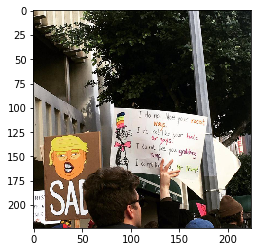

In [7]:
# test generator
first = dummy_test_generator.__getitem__(0)
image = first[0][0]
protest = first[1][0]
violence = first[1][1]
visual = first[1][2]
img = scipy.misc.toimage(image)
plt.imshow(img)
print("protest has shape", protest.shape, " violence has shape", violence.shape, " visual has shape", visual.shape)

Select training and validation sets

### Modeling

In [9]:
mask_value = -1
Kbackend.clear_session()

In [10]:
img_input = Klayers.Input(shape=(224,224,3), name='img_input')

resnet_model = Kapplications.ResNet50(include_top=False, weights = 'imagenet') (img_input)

flatten = Klayers.Flatten()(resnet_model)

protest_out = Klayers.Dense(1, activation='sigmoid', name='protest_out')(flatten)
violence_out = Klayers.Dense(1, activation='sigmoid', name='violence_out')(flatten)
visual_out = Klayers.Dense(10, activation='sigmoid', name='visual_out')(flatten)

model = Kmodels.Model(inputs= img_input, outputs=[protest_out, violence_out, visual_out])




In [13]:
lr = 0.01; momentum = 0.9; epochs = 5; patience = 15

In [15]:
optimizer = Koptimizers.SGD(lr=lr, momentum=momentum, nesterov=False)
model.compile(optimizer='rmsprop',
              loss={'protest_out': Klosses.binary_crossentropy,
                    'visual_out': au.buildMaskedLoss(Klosses.binary_crossentropy, mask_value), 
                    'violence_out': au.buildMaskedLoss(Klosses.mean_squared_error, mask_value)},
              loss_weights={'protest_out': 1., 
                            'visual_out': 5, 
                            'violence_out': 10 })
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
resnet50 (Model)                multiple             23587712    img_input[0][0]                  
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2048)         0           resnet50[1][0]                   
__________________________________________________________________________________________________
protest_out (Dense)             (None, 1)            2049        flatten_1[0][0]                  
__________________________________________________________________________________________________
violence_o

In [16]:
model_checkout_path = "models/UCLA_validation.hdf5"
csv_logger_path = "logs/UCLA_validation_log.csv"
log_dir="logs/{}".format(time.time())

# callbacks
change_lr = Kcallbacks.LearningRateScheduler(au.lrUpdateUCLA, 
                                            verbose = True)

checkpoint = Kcallbacks.ModelCheckpoint(model_checkout_path,
                                       monitor='val_loss', 
                                       verbose=1,
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='auto',
                                       period=1)

earlystop = Kcallbacks.EarlyStopping(monitor='val_loss',
                                    min_delta=0, 
                                    patience=patience,
                                    verbose=1, 
                                    mode='auto')

tensor_board = Kcallbacks.TensorBoard(log_dir='logs/',
                                     histogram_freq=0,
                                     batch_size=32, 
                                     write_graph=True,
                                     write_grads=False, 
                                     write_images=False, 
                                     embeddings_freq=0,
                                     embeddings_layer_names=None,
                                     embeddings_metadata=None)

csv_logger = Kcallbacks.CSVLogger(csv_logger_path, 
                                 separator=',', 
                                 append=False)

In [17]:
history = model.fit_generator(
    train_generator,
    validation_data= validation_generator,
    epochs=epochs,
    callbacks = [change_lr, checkpoint, earlystop, tensor_board, csv_logger])

Epoch 1/5

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


InvalidArgumentError: Incompatible shapes: [32,10] vs. [32,11]
	 [[Node: loss/visual_out_loss/mul_1 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](visual_out/Sigmoid, loss/visual_out_loss/Cast)]]

Caused by op 'loss/visual_out_loss/mul_1', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-efabecc139e1>", line 8, in <module>
    'violence_out': 10 })
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/keras/engine/training.py", line 830, in compile
    sample_weight, mask)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/keras/engine/training.py", line 429, in weighted
    score_array = fn(y_true, y_pred)
  File "/home/jesper/Documents/itu/2_year/thesis/analysis/lib/analysis_utils.py", line 82, in MaskedLossFunction
    return loss_function(y_true * mask, y_pred * mask)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 934, in binary_op_wrapper
    return func(x, y, name=name)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1161, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2789, in _mul
    "Mul", x=x, y=y, name=name)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/home/jesper/Documents/itu/2_year/thesis/venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [32,10] vs. [32,11]
	 [[Node: loss/visual_out_loss/mul_1 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](visual_out/Sigmoid, loss/visual_out_loss/Cast)]]


### Test set evaluation

In [33]:
preds = model.predict_generator(test_generator)
preds_protest = preds[0]
preds_violence = preds[1]
preds_visual = preds[2]
print("protest shape is ", preds_protest.shape, " violence shape is ", preds_violence.shape, "visual shape is ", preds_visual)

### Protest

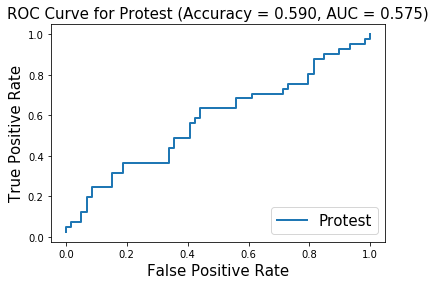

In [44]:
au.plotROC("protest", test_protest, preds_protest)

### Visual

sign


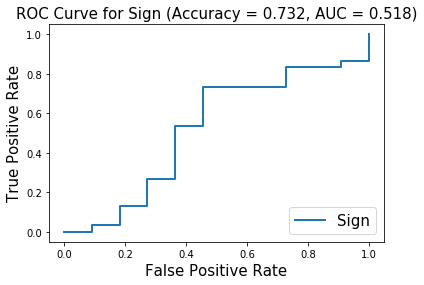

photo


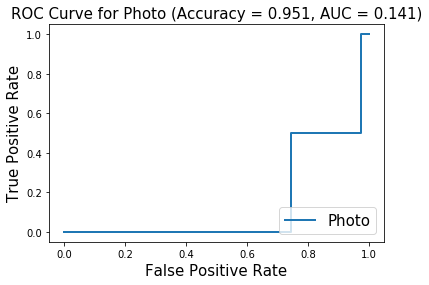

fire


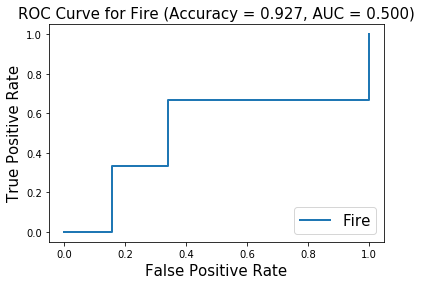

police


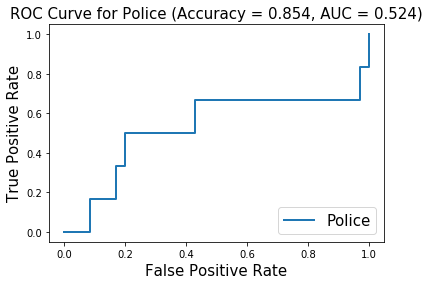

children
Only one class present in y_true. ROC AUC score is not defined in that case.
group_20


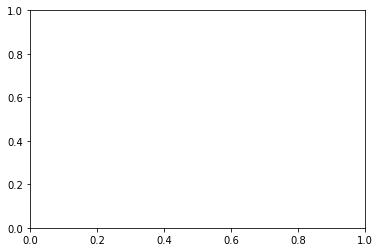

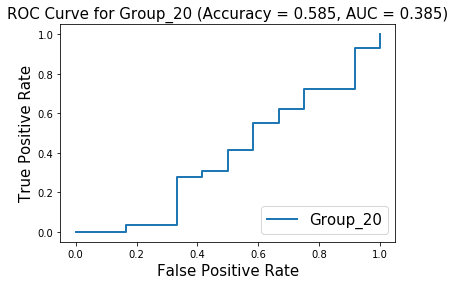

group_100


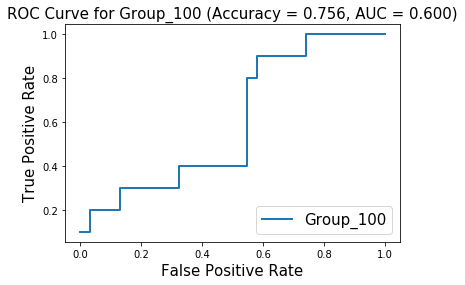

flag


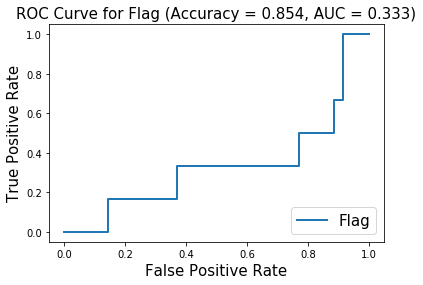

night


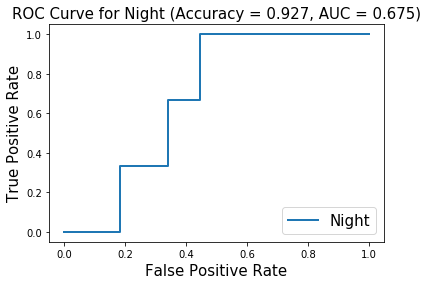

shouting


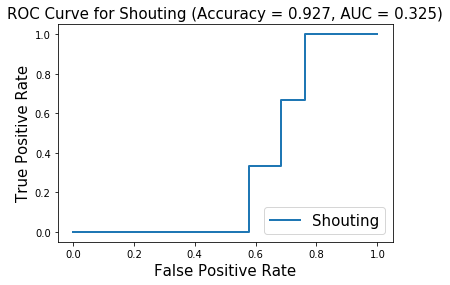

In [46]:
for i in range(preds_visual.shape[1]):
    pred = preds_visual[:,i]
    target = test_visual[:,i]
    
    # remove masked values from test set
    target_non_masked = target[target!= -1]
    pred_non_masked = pred[target!= -1]
    
    attr_indx = 3 + i # the visual attributes start from the 4th pos
    attr = df.columns[attr_indx]
    print(attr)
    try:
        au.plotROC(attr, target_non_masked, pred_non_masked)
    except Exception as e:
        print(e)

### Violence

In [47]:
# remove masked values from test set
non_masked_violence_true = test_violence[test_violence!= -1].tolist()
non_masked_violence_preds = preds_violence[test_violence!= -1].flatten().tolist()

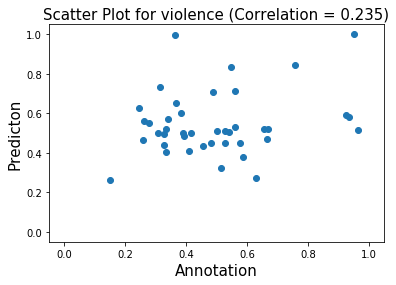

In [48]:
fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
plt.title(('Scatter Plot for {attr} (Correlation = {corr:.3f})'
            .format(attr = "violence", corr= corr)), fontsize = 15)
plt.show()